In [1]:
# 整理数据的库
import pandas as pd
import pingouin as pg
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt


# 高尔夫球水平

为了了解三家高尔夫球俱乐部的会员高尔夫球的水平是否有差异，随机各从三家俱乐部挑出5位会员，测试他们打高尔夫球的平均距离。


In [2]:
mylist = [1]*5 + [2]*5 + [3]*5 

In [3]:
df = pd.DataFrame(
    {
        "club":mylist,
        "distance":[254,263,241,237,251,234,218,235,227,216,200,222,197,206,204]
    }
)

In [4]:
df.club = df.club.astype("category")

In [5]:
df

,club,distance
0,1,254
1,1,263
2,1,241
3,1,237
4,1,251
5,2,234
6,2,218
7,2,235
8,2,227
9,2,216


In [17]:
aov = pg.anova(data=df, dv='distance', between='club', detailed=True)# anova ：Analysis of variances
print(aov)

   Source      SS  DF      MS          F    p-unc       np2
0    club  4716.4   2  2358.2  25.275456  0.00005  0.808156
1  Within  1119.6  12    93.3        NaN      NaN       NaN


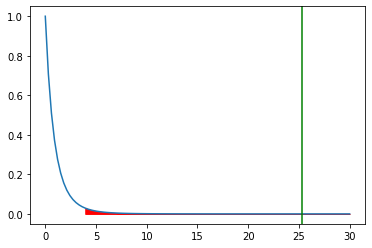

In [6]:
# 示意图
x = np.linspace(0,30,100)
y = stats.f.pdf(x,dfn =2 , dfd = 12)
limit = stats.f.ppf(q=0.95, dfn =2, dfd = 12) #临界值
plt.plot(x, y)
plt.axvline(x = 25.28 ,color = "g") #检验统计量
plt.fill_between(x,0,y, where= x > limit,color = "red") #拒绝域

In [18]:
#事后检验
posthoc = df.pairwise_tukey(dv = 'distance', between = 'club')
print(posthoc)

   A  B  mean(A)  mean(B)  diff       se         T   p-tukey    hedges
0  1  2    249.2    226.0  23.2  6.10901  3.797670  0.006634  2.169419
1  1  3    249.2    205.8  43.4  6.10901  7.104261  0.000034  4.058310
2  2  3    226.0    205.8  20.2  6.10901  3.306592  0.015990  1.888891


# 三个学习小组的成绩

In [13]:
df_grade = pd.DataFrame(
    {
        "group":mylist,
        "grade":[82,81,82,82,83,79,80,80,81,80,83,84,83,85,85]
    }
)
df_grade.group = df_grade.group.astype("category")

In [20]:
aov_grade = pg.anova(data=df_grade, dv='grade', between='group', detailed=True)
aov_grade

e:\installation\Anaconda\lib\site-packages\pingouin\parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


,Source,SS,DF,MS,F,p-unc,np2
0,group,40.0,2,20.000000,30.0,0.000021,0.833333
1,Within,8.0,12,0.666667,NaN,NaN,NaN


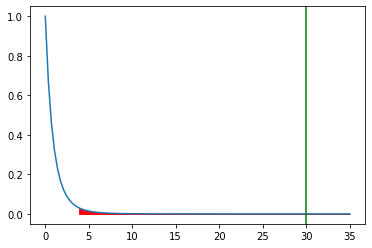

In [21]:
#示意图
x = np.linspace(0,35,100)
y = stats.f.pdf(x,dfn =2 , dfd = 12)
limit = stats.f.ppf(q=0.95, dfn =2, dfd = 12) #临界值
plt.plot(x, y)
plt.axvline(x = 30 ,color = "g") #检验统计量
plt.fill_between(x,0,y, where= x > limit,color = "red") #拒绝域

In [19]:
#事后检验
posthoc_grade = df_grade.pairwise_tukey(dv = 'grade', between = 'group')
posthoc_grade

e:\installation\Anaconda\lib\site-packages\pingouin\parametric.py:992: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  sserror = grp.apply(lambda x: (x - x.mean()) ** 2).sum()


,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,1,2,82.0,80.0,2.0,0.516398,3.872983,0.005803,2.212442
1,1,3,82.0,84.0,-2.0,0.516398,-3.872983,0.005803,-2.212442
2,2,3,80.0,84.0,-4.0,0.516398,-7.745967,0.000014,-4.424885
